# Libraries import

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

%matplotlib inline

# Loading data

In [4]:
arima_results = pd.read_csv('arima_results.csv', index_col = 0)
nbeats_results = pd.read_csv('nbeats_results.csv', index_col = 0)
prophet_results = pd.read_csv('prophet_results.csv', index_col = 0)
results = pd.read_csv('mae_results.csv', index_col = 0)
test_data = pd.read_csv('test_data.csv', index_col = 0)

In [11]:
arima_results

,ES080E,ES1000E,ES100E,ES1200E,ES125E,ES150E,ES200E,ES200E/16,ES250E,ES250E/16,...,XS450E,XS450E/16,XS500E,XS500E/16,XS600E,XS600E/16,XS700E,XS700E/16,XS800E,XS900E
Data,,,,,,,,,,,,,,,,,,,,,
2021-07-12,38,0,60,0,2,90,20,3,8,11,...,0,0,1,0,1,0,0,0,0,0
2021-07-19,41,0,83,0,2,88,27,3,29,9,...,0,0,1,0,1,0,0,0,0,0
2021-07-26,36,0,78,0,2,94,21,3,16,7,...,0,0,1,0,1,0,0,0,0,0
2021-08-02,39,0,76,0,2,59,36,3,8,5,...,0,0,1,0,1,0,0,0,0,0
2021-08-09,47,0,76,0,2,100,24,3,8,4,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,41,0,76,0,2,78,25,3,9,7,...,0,0,1,0,1,0,0,0,0,0
2023-01-09,41,0,76,0,2,84,25,3,9,7,...,0,0,1,0,1,0,0,0,0,0
2023-01-16,41,0,76,0,2,79,25,3,9,7,...,0,0,1,0,1,0,0,0,0,0


In [69]:
nbeats_results

,ES080E,ES1000E,ES100E,ES1200E,ES125E,ES150E,ES200E,ES200E/16,ES250E,ES250E/16,...,XS450E,XS450E/16,XS500E,XS500E/16,XS600E,XS600E/16,XS700E,XS700E/16,XS800E,XS900E
Data,,,,,,,,,,,,,,,,,,,,,
2021-07-12,17,0,8,1,17,94,25,-1,9,20,...,2,1,1,0,2,-1,1,0,-1,-2
2021-07-19,12,1,22,4,4,96,2,-1,5,6,...,0,1,1,0,5,1,-2,0,-5,2
2021-07-26,10,-1,57,2,3,21,6,-2,5,6,...,-1,-2,1,1,4,2,1,-1,1,-1
2021-08-02,7,0,53,0,3,11,1,1,6,-3,...,0,3,5,-1,-1,0,2,1,2,-1
2021-08-09,-3,0,0,-4,0,-7,0,0,2,0,...,0,0,-3,0,0,0,-1,1,-2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,22,1,31,-3,-2,53,13,2,19,17,...,-1,1,-1,1,2,3,-1,1,1,-1
2023-01-09,63,2,27,-3,4,53,15,1,7,4,...,0,-1,3,-1,5,0,-2,0,3,1
2023-01-16,119,3,174,0,14,183,35,8,41,31,...,1,0,-3,3,5,-4,0,0,-1,1


In [12]:
test_data

,ES080E,ES1000E,ES100E,ES1200E,ES125E,ES150E,ES200E,ES200E/16,ES250E,ES250E/16,...,XS500E/16,XS600E,XS600E/16,XS700E,XS700E/16,XS800E,XS900E,Cena rudy żelaza,Stan epidemii w Polsce,Inflacja
Data,,,,,,,,,,,,,,,,,,,,,
2021-07-12,8,0,52,0,0,48,8,0,10,30,...,0,0,0,0,0,0,0,216.03,1,105.1
2021-07-19,66,0,192,0,0,66,110,6,0,4,...,0,0,0,0,0,0,0,211.99,1,105.1
2021-07-26,222,0,66,0,6,260,98,0,16,2,...,0,0,0,0,0,0,0,172.01,1,105.1
2021-08-02,0,0,6,0,0,96,0,0,20,0,...,0,0,0,0,0,0,0,167.95,1,105.1
2021-08-09,20,0,18,0,0,28,0,0,0,0,...,0,2,0,0,0,0,0,160.54,1,105.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-02,0,0,0,0,0,10,4,0,0,0,...,0,0,0,0,0,0,0,122.33,0,116.6
2023-01-09,18,0,44,0,4,28,30,0,0,0,...,0,0,0,0,0,0,0,122.16,0,116.6
2023-01-16,36,0,24,0,0,4,16,0,0,0,...,0,0,0,0,0,0,0,122.70,0,116.6


# Visualisation of selected product forecast with AutoARIMA model

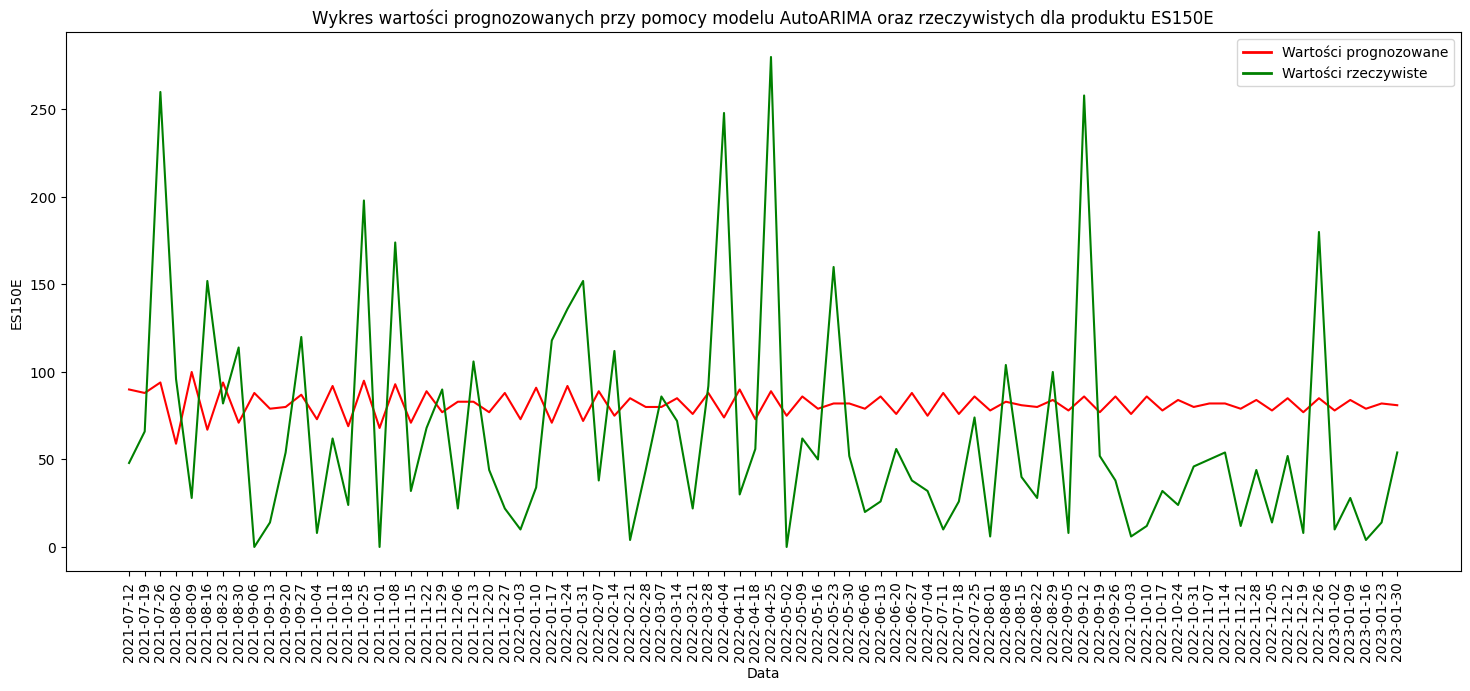

In [64]:
plt.figure(figsize=(18,7))
plt.title('Wykres wartości prognozowanych przy pomocy modelu AutoARIMA oraz rzeczywistych dla produktu ES150E')
plt.xticks(rotation = 90)
sns.lineplot(data = arima_results, x='Data', y='ES150E', color = 'red')
sns.lineplot(data = test_data, x='Data', y='ES150E', color = 'green')

custom_legend = [Line2D([0], [0], color='red', lw=2),
                 Line2D([0], [0], color='green', lw=2)]
plt.legend(custom_legend, ['Wartości prognozowane', 'Wartości rzeczywiste'])


In [66]:
arima_results['ES150E'].describe()

count     82.000000
mean      81.573171
std        7.253829
min       59.000000
25%       77.000000
50%       82.000000
75%       86.000000
max      100.000000
Name: ES150E, dtype: float64

In [68]:
test_data['ES150E'].describe()

count     82.000000
mean      64.658537
std       64.231107
min        0.000000
25%       22.000000
50%       45.000000
75%       89.000000
max      280.000000
Name: ES150E, dtype: float64

# Visualisation of selected product forecast with N-BEATS model

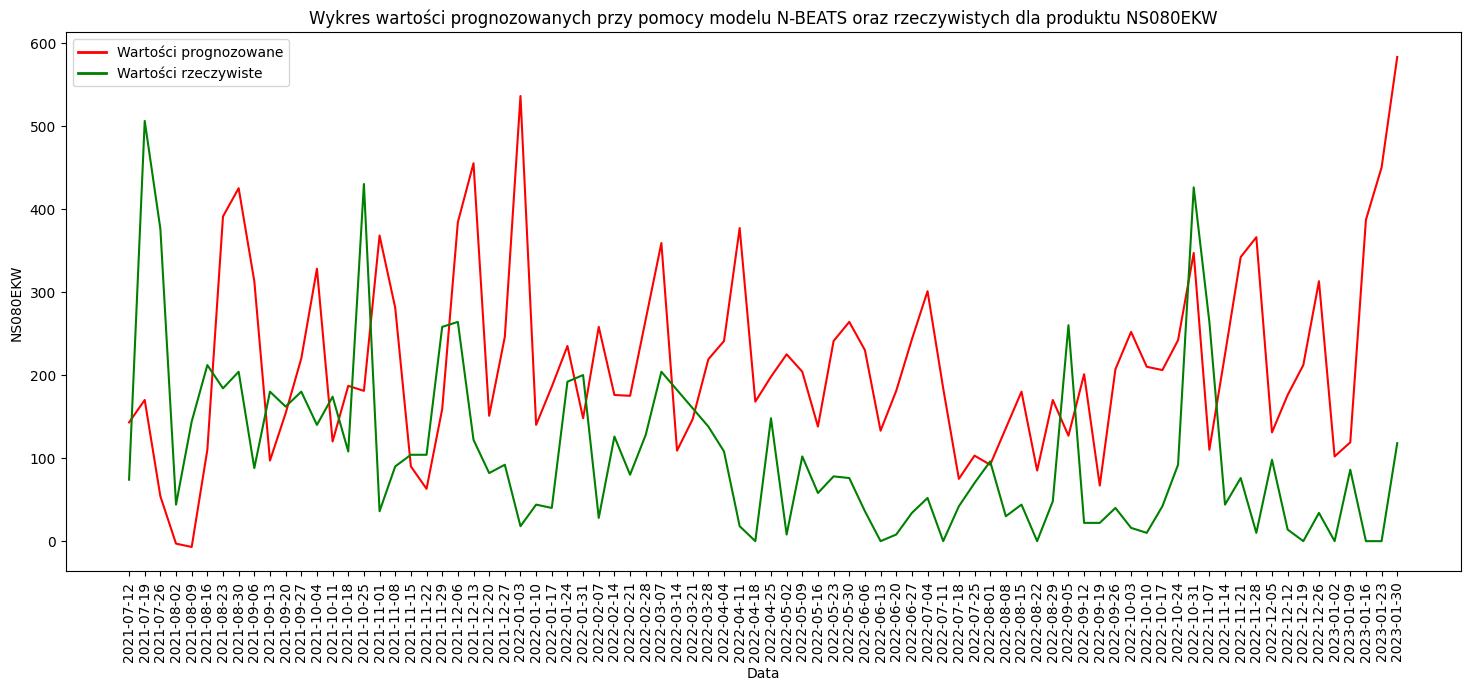

In [70]:
plt.figure(figsize=(18,7))
plt.title('Wykres wartości prognozowanych przy pomocy modelu N-BEATS oraz rzeczywistych dla produktu NS080EKW')
plt.xticks(rotation = 90)
sns.lineplot(data = nbeats_results, x='Data', y='NS080EKW', color = 'red')
sns.lineplot(data = test_data, x='Data', y='NS080EKW', color = 'green')

custom_legend = [Line2D([0], [0], color='red', lw=2),
                 Line2D([0], [0], color='green', lw=2)]
plt.legend(custom_legend, ['Wartości prognozowane', 'Wartości rzeczywiste'])

In [71]:
nbeats_results['NS080EKW'].describe()

count     82.000000
mean     214.378049
std      115.261339
min       -7.000000
25%      136.500000
50%      192.500000
75%      262.500000
max      583.000000
Name: NS080EKW, dtype: float64

In [72]:
test_data['NS080EKW'].describe()

count     82.000000
mean     105.219512
std      104.119948
min        0.000000
25%       34.000000
50%       81.000000
75%      147.000000
max      506.000000
Name: NS080EKW, dtype: float64

# Visualisation of selected product forecast with Prophet model

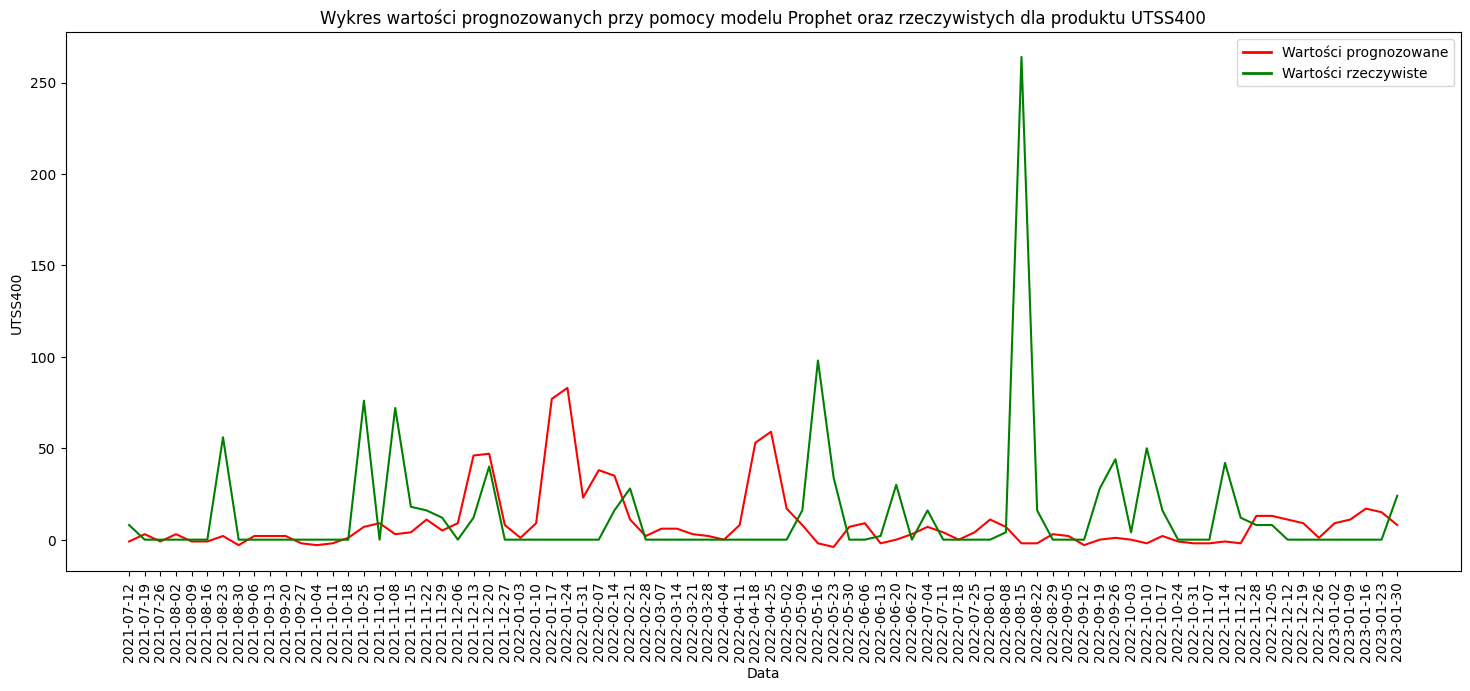

In [73]:
plt.figure(figsize=(18,7))
plt.title('Wykres wartości prognozowanych przy pomocy modelu Prophet oraz rzeczywistych dla produktu UTSS400')
plt.xticks(rotation = 90)
sns.lineplot(data = nbeats_results, x='Data', y='UTSS400', color = 'red')
sns.lineplot(data = test_data, x='Data', y='UTSS400', color = 'green')

custom_legend = [Line2D([0], [0], color='red', lw=2),
                 Line2D([0], [0], color='green', lw=2)]
plt.legend(custom_legend, ['Wartości prognozowane', 'Wartości rzeczywiste'])

In [76]:
prophet_results['UTSS400'].describe()

count    82.000000
mean      7.536585
std       6.483017
min      -3.000000
25%       2.000000
50%       6.000000
75%      13.000000
max      23.000000
Name: UTSS400, dtype: float64

In [75]:
test_data['UTSS400'].describe()

count     82.00000
mean      13.04878
std       34.05765
min        0.00000
25%        0.00000
50%        0.00000
75%       15.00000
max      264.00000
Name: UTSS400, dtype: float64

# Results visualisation

In [83]:
results

,AutoARIMA,N-BEATS,Prophet,Best model
ES080E,37.158537,42.426829,36.670732,Prophet
ES1000E,0.097561,1.829268,0.170732,AutoARIMA
ES100E,57.475610,65.719512,60.280488,AutoARIMA
ES1200E,0.024390,1.780488,0.134146,AutoARIMA
ES125E,6.243902,7.097561,6.353659,AutoARIMA
...,...,...,...,...
XS600E/16,0.000000,1.329268,0.012195,AutoARIMA
XS700E,0.000000,1.341463,0.121951,AutoARIMA
XS700E/16,0.048780,0.829268,0.048780,AutoARIMA
XS800E,0.219512,1.865854,0.329268,AutoARIMA


In [96]:
results.index

Index(['ES080E', 'ES1000E', 'ES100E', 'ES1200E', 'ES125E', 'ES150E', 'ES200E',
       'ES200E/16', 'ES250E', 'ES250E/16',
       ...
       'XS450E', 'XS450E/16', 'XS500E', 'XS500E/16', 'XS600E', 'XS600E/16',
       'XS700E', 'XS700E/16', 'XS800E', 'XS900E'],
      dtype='object', length=1262)

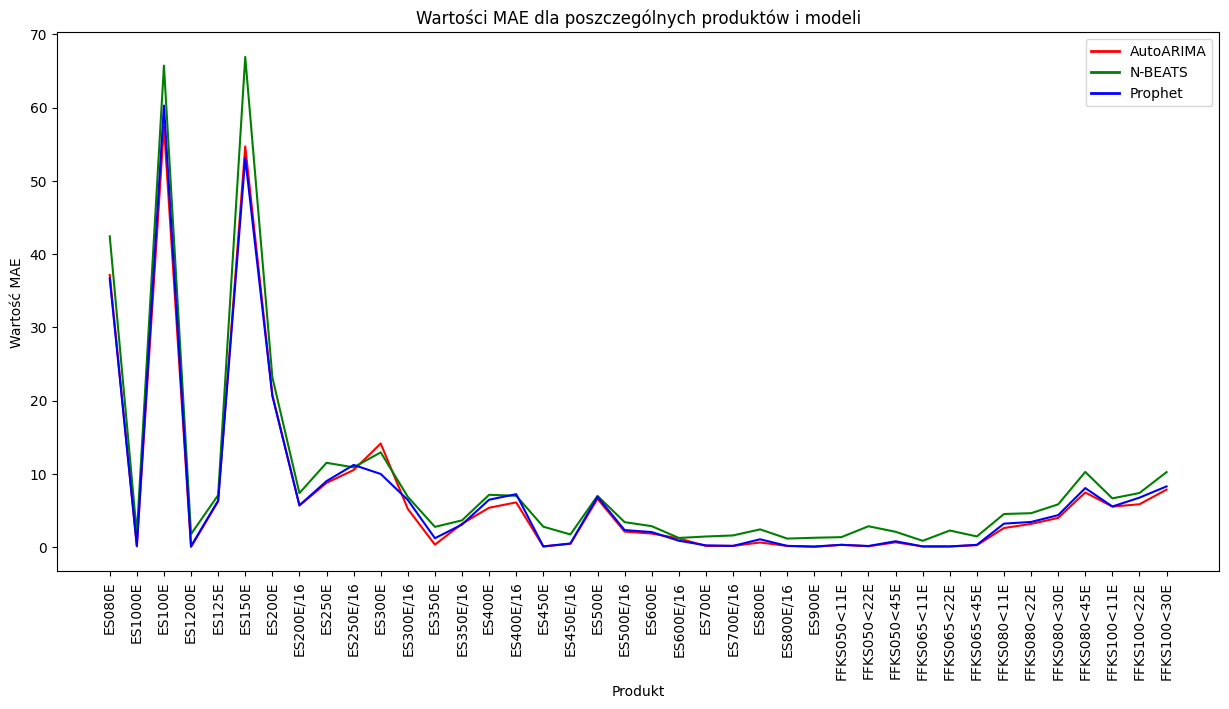

In [113]:
plt.figure(figsize=(15,7))
plt.title('Wartości MAE dla poszczególnych produktów i modeli')
plt.xticks(rotation = 90)
plt.ylabel('Wartość MAE')
plt.xlabel('Produkt')
sns.lineplot(data = results[0:40], x=results.index[0:40], y=results['AutoARIMA'][0:40], color = 'red')
sns.lineplot(data = results[0:40], x=results.index[0:40], y=results['N-BEATS'][0:40], color = 'green')
sns.lineplot(data = results[0:40], x=results.index[0:40], y=results['Prophet'][0:40], color = 'blue')

custom_legend = [Line2D([0], [0], color='red', lw=2),
                 Line2D([0], [0], color='green', lw=2), 
                 Line2D([0], [0], color='blue', lw=2)]
plt.legend(custom_legend, ['AutoARIMA', 'N-BEATS', 'Prophet'])
